**Essential Libraries**

In [29]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.svm import SVC
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

**Loading the Dataset**

In [30]:
data_train = pd.read_csv("/content/drive/MyDrive/Work/Thesis/mitbih_train.csv", header=None)
data_test = pd.read_csv("/content/drive/MyDrive/Work/Thesis/mitbih_test.csv", header=None)

In [31]:
data_test.drop(data_test[data_test[187] == 0].index, inplace = True)

In [32]:
data = pd.concat([ data_train, data_test ], axis=0)

In [33]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21891,0.973970,0.913232,0.865510,0.823210,0.746204,0.642082,0.547722,0.426247,0.325380,0.279826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


**Data Analysis**

In [35]:
data.shape

(91328, 188)

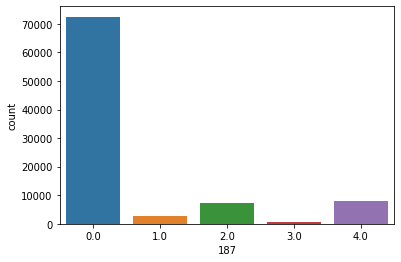

In [36]:
sns.countplot(x=data.columns[-1], data=data)

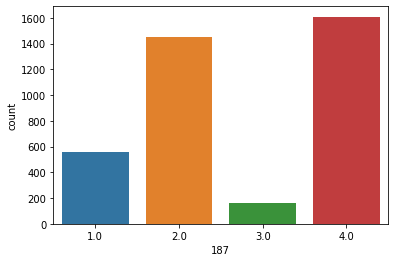

In [37]:
sns.countplot(x=data.columns[-1], data=data_test)

In [38]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
X = np.array(X)
y = np.array(y)

In [39]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (91328, 187)
Shape of y: (91328,)


**Plottng the Data**

In [40]:
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

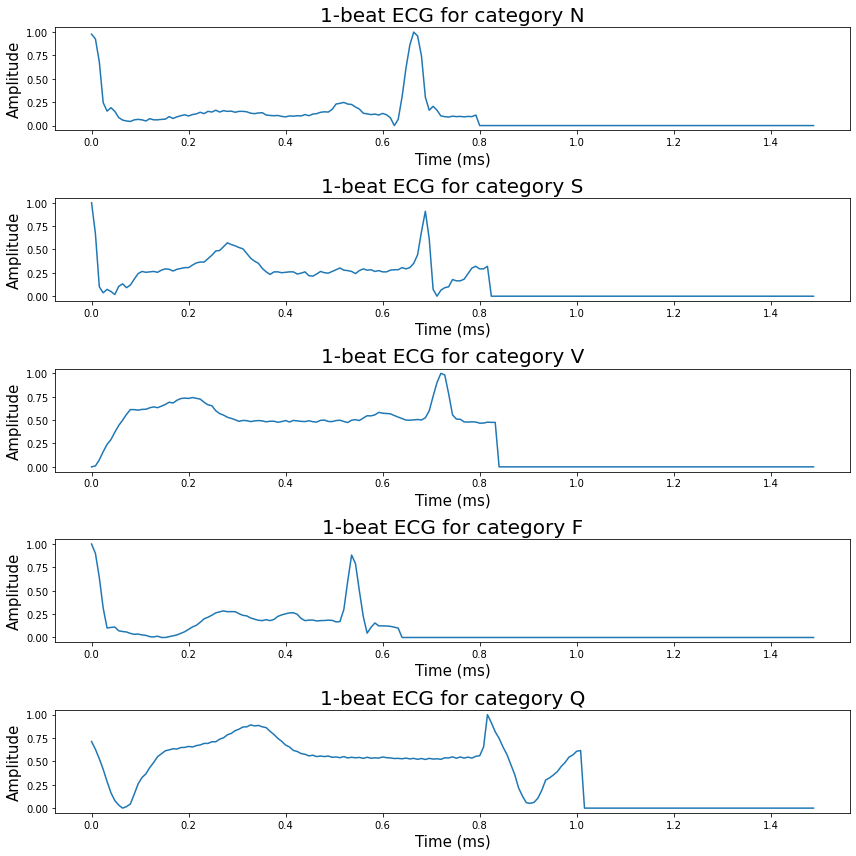

In [41]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(12,12))
plt.subplot(5, 1, 1)

plt.plot(x, X[C0, :][0], label="Cat. N")
plt.title("1-beat ECG for category N", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1,2)
plt.plot(x, X[C1, :][0], label="Cat. S")
plt.title("1-beat ECG for category S", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1,3)
plt.plot(x, X[C2, :][0], label="Cat. V")
plt.title("1-beat ECG for category V", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1, 4)
plt.plot(x, X[C3, :][0], label="Cat. F")
plt.title("1-beat ECG for category F", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)

plt.subplot(5,1,5)
plt.plot(x, X[C4, :][0], label="Cat. Q")
plt.title("1-beat ECG for category Q", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.tight_layout()
plt.show()

**Data Cleaning**

In [42]:
data[187] = data[187].astype('int')

In [43]:
data[187].unique()

array([0, 1, 2, 3, 4])

In [44]:
data[187].value_counts()

0    72471
4     8039
2     7236
1     2779
3      803
Name: 187, dtype: int64

**The data set is unbalanced, as can be seen. Therefore, the data needs to be balanced so that each category maintains a particular volume for which the training will be more effective. According to the distribution, category 0 has the biggest volume, while category 3 has the lowest. Therefore, we raise the volume of the other 4 categories to 20000 while decreasing the volume of category 0 to 20000.**

In [45]:
zero = data[data[187]==0].sample(20000)

In [46]:
data.drop(data[data[187]==0].index, inplace=True)

In [47]:
data.shape

(15083, 188)

In [48]:
data = pd.concat([zero, data], axis=0)

In [49]:
data.shape

(35083, 188)

In [50]:
data[187].value_counts()

0    20000
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

In [51]:
X = data.drop(187, axis=1)
y = data[187]

In [52]:
X.shape

(35083, 187)

In [53]:
y.shape

(35083,)

**We have used smote technique to oversample the data**

In [54]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64

**Splitting the dataset------ 80% Training and 20% Testing**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=10, stratify=y_sm)

**Training Model**

In [59]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

**Evaluating Model Performance**

**Training Accuracy**

In [60]:
model.score(X_train, y_train)

0.9996

**Testing Accuracy**

In [61]:
model.score(X_test, y_test)

0.9828

**Prediction**

In [62]:
y_pred = model.predict(X_test)

**Classification Report Using Random Forest Classifier**

In [63]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4000
           1       0.98      0.98      0.98      4000
           2       0.99      0.97      0.98      4000
           3       0.99      0.99      0.99      4000
           4       1.00      0.99      0.99      4000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



**Now Building the Model with Neural Network (CNN + ANN)**

In [64]:
model_CNN_ANN = Sequential()

model_CNN_ANN.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(187, 1)))
model_CNN_ANN.add(MaxPooling1D(pool_size=2))

model_CNN_ANN.add(Flatten())

model_CNN_ANN.add(Dense(256, activation='relu'))
model_CNN_ANN.add(Dropout(0.2))
model_CNN_ANN.add(Dense(256, activation='relu'))

model_CNN_ANN.add(Dense(128, activation='relu'))
model_CNN_ANN.add(Dropout(0.5))
model_CNN_ANN.add(Dense(128, activation='relu'))

model_CNN_ANN.add(Dense(5, activation='softmax'))

In [65]:
model_CNN_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 185, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 92, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2944)              0         
                                                                 
 dense (Dense)               (None, 256)               753920    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                        

In [66]:
model_CNN_ANN.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model_CNN_ANN.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
80000/80000 [==============================] - 583s 7ms/step - loss: 0.4174 - accuracy: 0.8612
Epoch 2/10
80000/80000 [==============================] - 564s 7ms/step - loss: 0.3225 - accuracy: 0.9025
Epoch 3/10
80000/80000 [==============================] - 576s 7ms/step - loss: 0.3515 - accuracy: 0.8978
Epoch 4/10
80000/80000 [==============================] - 556s 7ms/step - loss: 0.3766 - accuracy: 0.8899
Epoch 5/10
80000/80000 [==============================] - 566s 7ms/step - loss: 0.4111 - accuracy: 0.8824
Epoch 6/10
80000/80000 [==============================] - 598s 7ms/step - loss: 0.4266 - accuracy: 0.8763
Epoch 7/10
80000/80000 [==============================] - 594s 7ms/step - loss: 0.4679 - accuracy: 0.8673
Epoch 8/10
80000/80000 [==============================] - 570s 7ms/step - loss: 0.5158 - accuracy: 0.8557
Epoch 9/10
80000/80000 [==============================] - 558s 7ms/step - loss: 0.5189 - accuracy: 0.8582
Epoch 10/10
80000/80000 [=====================

**Evaluating Model Performance**

**Training Accuracy**

In [67]:
model_CNN_ANN.evaluate(X_train, y_train)

2500/2500 [==============================] - 14s 6ms/step - loss: 0.3236 - accuracy: 0.9057


[0.3235969841480255, 0.9056500196456909]

**Testing Accuracy**

In [68]:
model_CNN_ANN.evaluate(X_test, y_test)

625/625 [==============================] - 3s 5ms/step - loss: 0.3494 - accuracy: 0.8971


[0.3494149446487427, 0.8970500230789185]

**Prediction**

In [74]:
result = model_CNN_ANN.predict(X_test)
result = result.argmax(axis=1)

625/625 [==============================] - 3s 5ms/step


**Accuracy VS Loss Plotting**

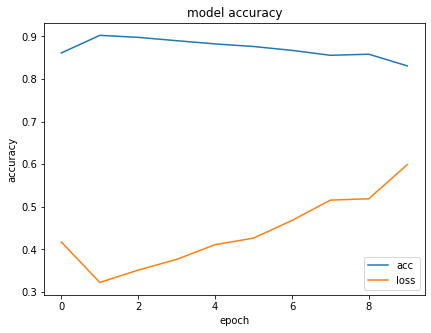

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc','loss'], loc='lower right')
plt.show()

**Classification Report Using Neural Network (CNN + ANN)**

In [75]:
print("Classification Report: \n", classification_report(y_test, result))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      4000
           1       0.92      0.86      0.89      4000
           2       0.89      0.91      0.90      4000
           3       0.92      0.91      0.91      4000
           4       0.97      0.96      0.96      4000

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



**Comparing the Two Classifier**

**Random Forest Classifier**




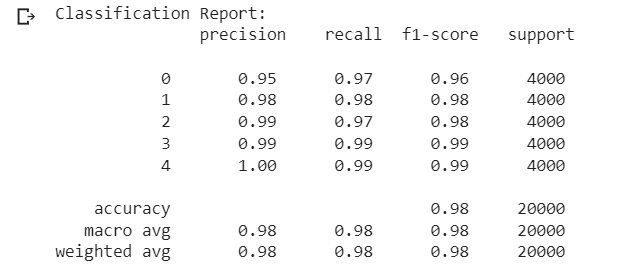

**Neural Network (CNN + ANN)**




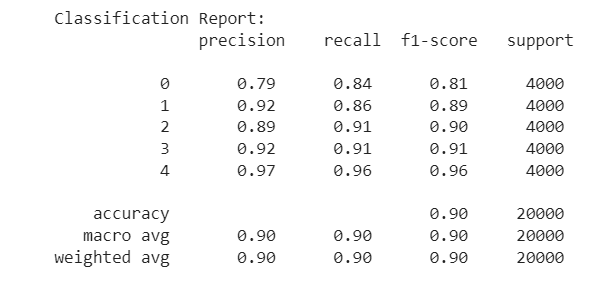

**Conclusion**

When comparing the two models, it can be shown that the random forest classifier performs better overall. While neural networks perform well, they fall short of random forests in this regard. Compared to neural networks, random forests have higher precision, recall, and f1 score values for all five categories. The Random Forest will therefore be chosen for model training.

**Saving the model**

In [77]:
#model_CNN_ANN.save("/content/drive/MyDrive/Work/Thesis/model_CNN_ANN.h5")

**For Loading the model**

In [ ]:
#model_CNN_ANN = keras.models.load_model("/content/drive/MyDrive/Work/Thesis/model_CNN_ANN.h5")